In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import astropy.io.fits as pyfits
import numpy as np
import utils as myutils
import scipy.integrate as integrate
from astropy.modeling.functional_models import Sersic2D
from scipy import stats



plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'xtick.labelsize': 16})
plt.rcParams.update({'ytick.labelsize': 16})
plt.rcParams.update({'axes.linewidth': 2})

path = r'G:\Mi unidad\Universidad\Master_Astro\TFM\ALMA_images\Original\\'
path1 = r'G:\Mi unidad\Universidad\Master_Astro\TFM\ALMA_images\Fitted\Gaussian\data_fit_Gaussian.csv'
path2 = r'G:\Mi unidad\Universidad\Master_Astro\TFM\ALMA_images\Fitted\Sersic\data_fit_Sersic.csv'
path3 = r'G:\Mi unidad\Universidad\Master_Astro\TFM\ALMA_images\Fitted\Gaussian+Sersic\data_fit_Gaussian+Sersic.csv'
gaussian = pd.read_csv(path1)
sersic = pd.read_csv(path2)
combined = pd.read_csv(path3)

In [2]:
names = ['AL-65.1', 'AL-57.1','AL115.1','AL74.1','AL71.1','AL70.1','AL49.1','AL19.1','AL11.1','AL-122.1',
         'AL-116.2','AL-84.1','AL-80.1','AL-75.1','AL-66.1','LESS76','LESS73','LESS67', 'LESS45','LESS39',
         'LESS29', 'LESS17', 'LESS15', 'LESS10', 'LESS9', 'LESS5', 'LESS3','LESS1', 'XID917', 'XID371',
         'XID360', 'XID301', 'XID156', 'XID36', 'LESS112', 'LESS101']

bmin_ = []
bmaj_ = []
dx= []
dy = []
sources = os.listdir(path)[0:-1]
path = r'G:\Mi unidad\Universidad\Master_Astro\TFM\ALMA_images\Original\\'

for i in range(0,len(names)):
    fits_file  = pyfits.open(path+sources[i])
    bmaj_.append(fits_file[0].header['BMAJ']*3600)
    bmin_.append(fits_file[0].header['BMIN']*3600)
    dx.append(fits_file[0].header['CDELT1']*3600)
    dy.append(fits_file[0].header['CDELT2']*3600)

In [3]:
sersic['dx'] = dx
sersic['dy'] = dy
gaussian['dx'] = dx
gaussian['dy'] = dy

gaussian['Bmaj'] = bmaj_
sersic['Bmaj'] = bmaj_
gaussian['Bmin'] = bmin_
sersic['Bmin'] = bmin_

In [4]:
gaussian

,Source,SN,Relative RA G [arcsec],Relative RA G low [arcsec],Relative RA G up [arcsec],Relative Dec G [arcsec],Relative Dec G low,Relative Dec G up,FWHM x G [arcsec],FWHM x G low,...,Angle G low [deg],Angle G up [deg],Amplitude G [mJy],Amplitude G low [mJy],Amplitude G up [mJy],BIC G,dx,dy,Bmaj,Bmin
0,AL-65.1,37.789204,0.011575,0.000537,0.000533,0.005827,0.000688,0.000701,0.234366,0.002181,...,1.400194,1.422925,0.952507,0.007314,0.007508,467.555528,-0.020,0.020,0.127690,0.073756
1,AL-57.1,13.515665,0.007689,0.001604,0.001614,-0.029299,0.001132,0.001134,0.284275,0.003473,...,0.468553,0.227496,0.787161,0.010769,0.010862,-3130.969876,-0.020,0.020,0.127605,0.073820
2,AL115.1,35.081707,-0.004031,0.000982,0.000969,0.009686,0.000840,0.000833,0.357454,0.002784,...,0.075263,0.033863,1.387937,0.010243,0.010207,1936.282016,-0.030,0.030,0.165218,0.118549
3,AL74.1,19.958647,-0.002640,0.001050,0.001051,0.005179,0.001813,0.001807,0.320940,0.004338,...,0.915735,0.907679,1.222936,0.016416,0.016331,-2543.515333,-0.030,0.030,0.165108,0.118975
4,AL71.1,27.776854,0.001074,0.000961,0.000969,0.043966,0.001464,0.001466,0.421637,0.004766,...,0.452920,0.453155,0.653564,0.006452,0.006481,-2114.989631,-0.025,0.025,0.137226,0.084663
5,AL70.1,50.975857,0.008559,0.000507,0.000508,0.014886,0.000472,0.000473,0.213328,0.001304,...,0.999551,1.005010,2.932893,0.017687,0.017899,-3068.452815,-0.030,0.030,0.164463,0.118826
6,AL49.1,36.776318,0.014321,0.000843,0.000847,0.007675,0.000556,0.000564,0.253376,0.002012,...,0.064401,0.029269,2.323825,0.018718,0.018689,-2954.836205,-0.030,0.030,0.164967,0.118677
7,AL19.1,33.440334,-0.006819,0.001085,0.001088,0.003345,0.000589,0.000585,0.330754,0.002768,...,0.385865,0.391842,2.236055,0.018309,0.018211,-3018.205803,-0.030,0.030,0.164312,0.118848
8,AL11.1,22.547075,0.019049,0.001035,0.001058,0.021377,0.001523,0.001532,0.395389,0.004251,...,0.688256,0.680063,1.655119,0.016442,0.016743,-2535.460596,-0.030,0.030,0.165315,0.118526
9,AL-122.1,24.507975,0.007286,0.000995,0.000998,0.000428,0.000689,0.000687,0.200339,0.002573,...,0.824166,0.490044,0.736347,0.010524,0.010625,-1745.165382,-0.020,0.020,0.126757,0.073512


In [5]:
gaussian.columns

Index(['Source', 'SN', 'Relative RA G  [arcsec]', 'Relative RA G low [arcsec]',
       'Relative RA G up [arcsec]', 'Relative Dec G [arcsec]',
       'Relative Dec G low', 'Relative Dec G up', 'FWHM x G [arcsec]',
       'FWHM x G low', 'FWHM x G up', 'FWHM y G [arcsec]', 'FWHM y G low',
       'FWHM y G up', 'Angle G [deg]', 'Angle G low [deg]', 'Angle G up [deg]',
       'Amplitude G [mJy]', 'Amplitude G low [mJy]', 'Amplitude G up [mJy]',
       'BIC G', 'dx', 'dy', 'Bmaj', 'Bmin'],
      dtype='object')

In [6]:
gaussian[gaussian['Source']=='LESS10']['Amplitude G [mJy]']

23    0.635044
Name: Amplitude G [mJy], dtype: float64

In [8]:
total_flux_g = []
total_flux_err_G = []
total_flux_S = []
total_flux_err_S = []
total_flux_GS = []
total_flux_err_GS = []


for i in range(len(gaussian)):
    amp = gaussian['Amplitude G [mJy]'][i]
    theta_rad = gaussian['Angle G [deg]'][i]
    sigmax_ang = (gaussian['FWHM x G [arcsec]']/(2 * np.sqrt(2 * np.log(2))))[i]
    sigmay_ang = (gaussian['FWHM y G [arcsec]']/(2 * np.sqrt(2 * np.log(2)))) [i]
    x_cen = gaussian['Relative RA G  [arcsec]'][i]
    y_cen = gaussian['Relative Dec G [arcsec]'][i]
    bmaj_ = gaussian['Bmaj'][i]
    bmin_ = gaussian['Bmin'][i]
    dx = gaussian['dx'][i]
    theta = [amp * (4*np.log(2) / (np.pi*bmaj_*bmin_)), x_cen, y_cen, sigmax_ang, sigmay_ang, theta_rad]
    
     
    l = lambda y, x: myutils.model_twoD_Gaussian(theta, x, y)
    integr, err = integrate.dblquad(l, -np.inf, np.inf, -np.inf, np.inf)
    total_flux_g.append(integr)
    total_flux_err_G.append(err)

for i in range(len(sersic)):
    amp = sersic['Amplitude S [mJy]'][i]
    theta_rad = sersic['Angle S'][i]
    theta_rad = np.radians(180-theta_rad)
    r_eff = sersic['Effective radius S [arcsec]'][i]
    x_cen = sersic['Relative RA S  [arcsec]'][i]
    y_cen = sersic['Relative Dec S [arcsec]'][i]
    ellip  = sersic['Ellipticity'][i]    
    bmaj_ = sersic['Bmaj'][i]
    bmin_ = sersic['Bmin'][i]
    
    
#     a_eff = lambda y, x: Sersic2D(amp, r_eff, 1, 0, 0, ellip, 0)(x, y)
#     A = integrate.dblquad(a_eff, 0, r_eff, 0 ,lambda x: np.sqrt((r_eff**2 - (x)**2)*(1-ellip)**2))[0] * 4   
    
    model = Sersic2D(amp * ( 4 * np.log(2) / (np.pi*bmaj_*bmin_)), r_eff, 1, x_cen, y_cen, ellip, theta_rad)
    l = lambda y, x: model(x, y)
    integr, err = integrate.dblquad(l, -np.inf, np.inf, -np.inf, np.inf)
    total_flux_S.append(integr)
    total_flux_err_S.append(err)
    
# for i in range(len(combined)):
#     amp = combined['Amplitude sersic G+S [mJy]'][i]
#     theta_rad = combined['Angle sersic  [deg]'][i]
#     theta_rad = np.radians(180-theta_rad)
#     r_eff = combined['Effective radius S [arcsec]'][i]
#     x_cen = combined['Relative RA G+S  [arcsec]'][i]
#     y_cen = combined['Relative Dec G+S [arcsec]'][i]
#     ellip  = combined['Ellipticity'][i]    
#     model = Sersic2D(amp, r_eff, 1, x_cen, y_cen, ellip, theta_rad)
#     l = lambda y, x: model(x, y)
#     integr_S, err_S = integrate.dblquad(l, -np.inf, np.inf, -np.inf, np.inf)
    
    
#     amp = combined['Amplitude G+S [mJy]'][i]
#     theta_rad = combined['Angle gaussian [deg]'][i]
#     sigmax_ang = (combined['FWHM x G+S [arcsec]']/(2 * np.sqrt(2 * np.log(2))))[i]
#     sigmay_ang = (combined['FWHM y G+S [arcsec]']/(2 * np.sqrt(2 * np.log(2)))) [i]
#     x_cen = combined['Relative RA G+S  [arcsec]'][i]
#     y_cen = combined['Relative Dec G+S [arcsec]'][i]
#     theta = [amp, x_cen, y_cen, sigmax_ang, sigmay_ang, theta_rad]
#     l = lambda y, x: myutils.model_twoD_Gaussian(theta, x, y)
#     integr, err = integrate.dblquad(l, -np.inf, np.inf, -np.inf, np.inf)
#     total_flux_GS.append(integr_G+integr_S)
#     total_flux_err_GS.append(err_S+err_G)

In [9]:
gaussian['Flux'] = total_flux_g
gaussian['Flux_err'] = total_flux_err_G
sersic['Flux'] = total_flux_S
sersic['Flux_err'] = total_flux_err_S


# combined['Flux'] = total_flux_GS
# combined['Flux_err'] = total_flux_err_GS

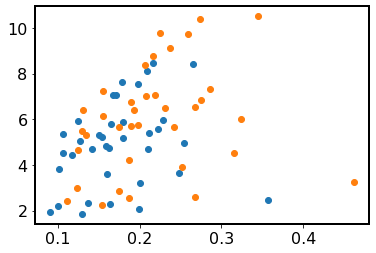

In [10]:
plt.scatter(gaussian['FWHM x G [arcsec]']*0.5,gaussian['Flux'])
plt.scatter(sersic['Effective radius S [arcsec]'],sersic['Flux'])

In [11]:
for i in range(len(gaussian)):
    print('Reff Gaussian:  ',round(gaussian['FWHM x G [arcsec]'][i]*0.5,3),' Reff Sersic:  ',round(sersic['Effective radius S [arcsec]'][i],3),
         'Flux Gaussian:', round(gaussian['Flux'][i],3),' Flux Sersic:', round(sersic['Flux'][i],3))

Reff Gaussian:   0.117  Reff Sersic:   0.135 Flux Gaussian: 4.455  Flux Sersic: 5.319
Reff Gaussian:   0.142  Reff Sersic:   0.175 Flux Gaussian: 4.706  Flux Sersic: 5.652
Reff Gaussian:   0.179  Reff Sersic:   0.225 Flux Gaussian: 7.64  Flux Sersic: 9.762
Reff Gaussian:   0.16  Reff Sersic:   0.187 Flux Gaussian: 3.592  Flux Sersic: 4.226
Reff Gaussian:   0.211  Reff Sersic:   0.242 Flux Gaussian: 4.696  Flux Sersic: 5.64
Reff Gaussian:   0.107  Reff Sersic:   0.131 Flux Gaussian: 5.358  Flux Sersic: 6.419
Reff Gaussian:   0.127  Reff Sersic:   0.156 Flux Gaussian: 5.042  Flux Sersic: 6.134
Reff Gaussian:   0.165  Reff Sersic:   0.207 Flux Gaussian: 5.788  Flux Sersic: 7.019
Reff Gaussian:   0.198  Reff Sersic:   0.238 Flux Gaussian: 7.549  Flux Sersic: 9.104
Reff Gaussian:   0.1  Reff Sersic:   0.123 Flux Gaussian: 2.186  Flux Sersic: 2.983
Reff Gaussian:   0.102  Reff Sersic:   0.125 Flux Gaussian: 3.823  Flux Sersic: 4.633
Reff Gaussian:   0.106  Reff Sersic:   0.13 Flux Gaussian: 

1.2224954625441977


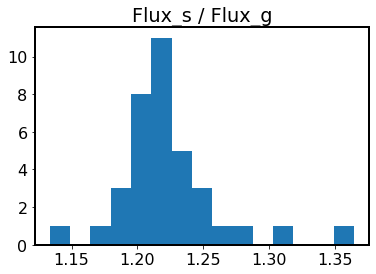

In [12]:
plt.hist(sersic['Flux']/gaussian['Flux'],15)
print(np.mean(sersic['Flux']/gaussian['Flux']))
plt.title('Flux_s / Flux_g')
plt.show()

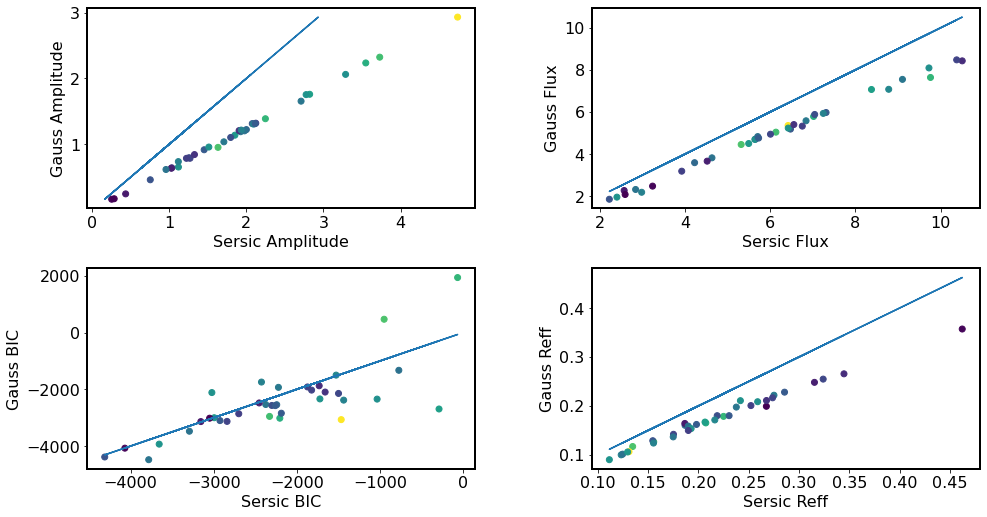

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 8))

plt1 = ax[0,0].scatter(sersic['Amplitude S [mJy]']*np.exp(1.67),gaussian['Amplitude G [mJy]'],c=gaussian['SN'])
ax[0,0].plot(gaussian['Amplitude G [mJy]'],gaussian['Amplitude G [mJy]'])
ax[0,0].set_ylabel('Gauss Amplitude')
ax[0,0].set_xlabel('Sersic Amplitude')

ax[0,1].scatter(sersic['Flux'],gaussian['Flux'],c=gaussian['SN'])
ax[0,1].plot(sersic['Flux'],sersic['Flux'])
ax[0,1].set_ylabel('Gauss Flux')
ax[0,1].set_xlabel('Sersic Flux')

ax[1,0].scatter(sersic['BIC S'],gaussian['BIC G'],c=gaussian['SN'])
ax[1,0].plot(sersic['BIC S'],sersic['BIC S'])
ax[1,0].set_ylabel('Gauss BIC')
ax[1,0].set_xlabel('Sersic BIC')

ax[1,1].scatter(sersic['Effective radius S [arcsec]'],gaussian['FWHM x G [arcsec]']*0.5,c=gaussian['SN'])
ax[1,1].plot(sersic['Effective radius S [arcsec]'],sersic['Effective radius S [arcsec]'])
ax[1,1].set_ylabel('Gauss Reff')
ax[1,1].set_xlabel('Sersic Reff')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)



In [27]:
pd.options.display.max_columns = None


gaussian[gaussian.Source=='AL115.1']

,Source,SN,Relative RA G [arcsec],Relative RA G low [arcsec],Relative RA G up [arcsec],Relative Dec G [arcsec],Relative Dec G low,Relative Dec G up,FWHM x G [arcsec],FWHM x G low,FWHM x G up,FWHM y G [arcsec],FWHM y G low,FWHM y G up,Angle G [deg],Angle G low [deg],Angle G up [deg],Amplitude G [mJy],Amplitude G low [mJy],Amplitude G up [mJy],BIC G,dx,dy,Bmaj,Bmin,Flux,Flux_err
2,AL115.1,35.081707,-0.004031,0.000982,0.000969,0.009686,0.00084,0.000833,0.357454,0.002784,0.00282,0.301608,0.002367,0.002399,179.954726,0.075263,0.033863,1.387937,0.010243,0.010207,1936.282016,-0.03,0.03,0.165218,0.118549,7.639762,1.246808e-08


In [28]:
0.357454/2

0.178727